<a href="https://colab.research.google.com/github/nshaganti/nshaganti-estimating-the-profitability-of-discounts-lp/blob/main/Getting_Familiar_with_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/nshaganti/nshaganti-estimating-the-profitability-of-discounts-lp.git

Cloning into 'nshaganti-estimating-the-profitability-of-discounts-lp'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 522.30 KiB | 4.75 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [12]:
import os
repo = 'nshaganti-estimating-the-profitability-of-discounts-lp'
if os.getcwd().split("/")[-1] == repo:
  print("Already in the correct directory")
else:
  os.chdir(repo)
  print(f"Changed working directory to: {repo}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import graphviz as gr

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Already in the correct directory


In [13]:
data = pd.read_csv("non_rand_discount.csv", delimiter=";")

In [14]:
data.shape

(15000, 45)

In [15]:
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [16]:
# understand the inferred data types
data.dtypes

,0
spend_1m_baby,int64
spend_2m_baby,int64
spend_3m_baby,int64
spend_4m_baby,int64
spend_5m_baby,int64
spend_6m_baby,float64
spend_1m_clothes,int64
spend_2m_clothes,float64
spend_3m_clothes,float64
spend_4m_clothes,float64


In [20]:
# parse the discount
data["discount"] = (data["discount"].str.split(" ").str[-1]).astype(float)

In [21]:
# check for any missing data
data.isna().sum()

,0
spend_1m_baby,0
spend_2m_baby,0
spend_3m_baby,0
spend_4m_baby,0
spend_5m_baby,0
spend_6m_baby,0
spend_1m_clothes,0
spend_2m_clothes,0
spend_3m_clothes,0
spend_4m_clothes,0


In [23]:
data["profits"] = 0.05 * data["sales"] - data["discount"]

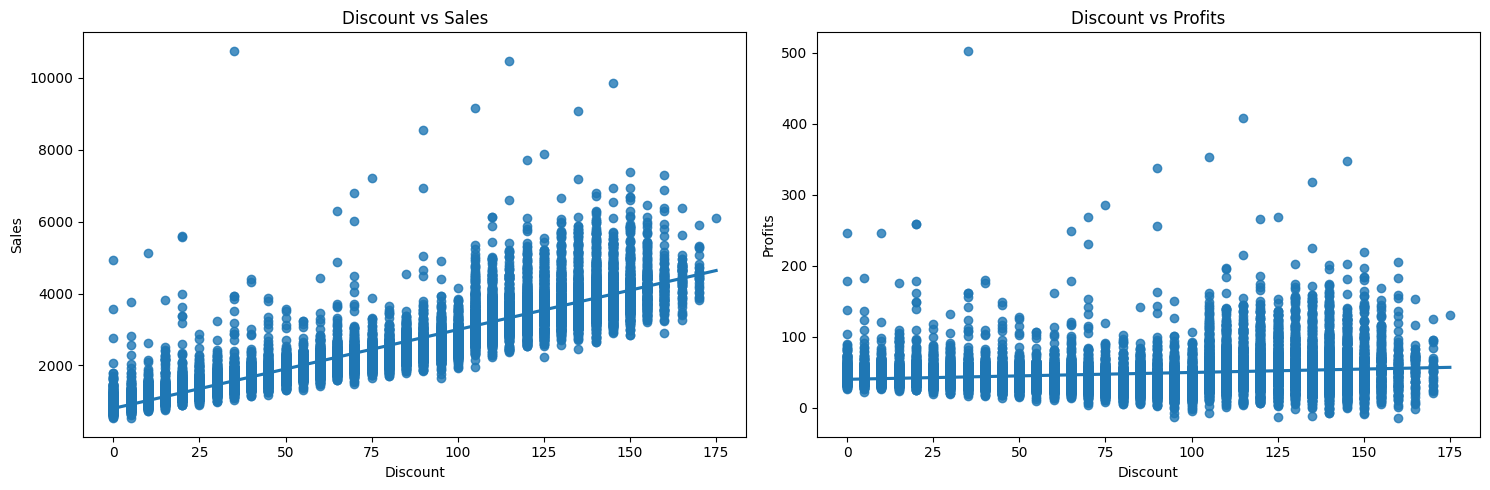

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Discount vs Sales
sns.regplot(x='discount', y='sales', data=data, ax=axes[0])
axes[0].set_title('Discount vs Sales')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Sales')

# Plot 2: Discount vs Profits
sns.regplot(x='discount', y='profits', data=data, ax=axes[1])
axes[1].set_title('Discount vs Profits')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Profits')

plt.tight_layout()
plt.show()

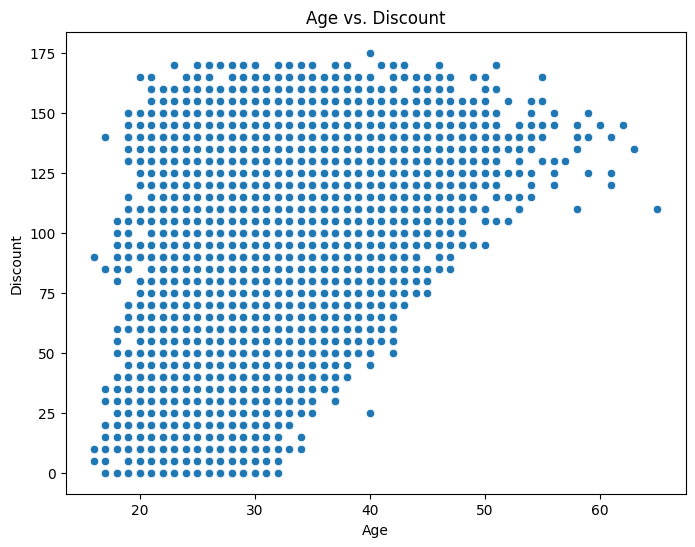

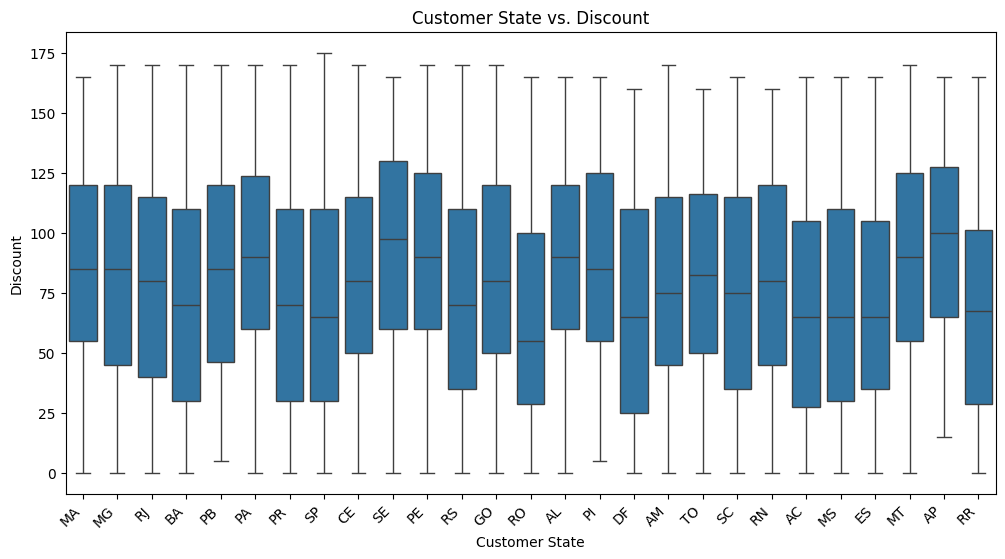

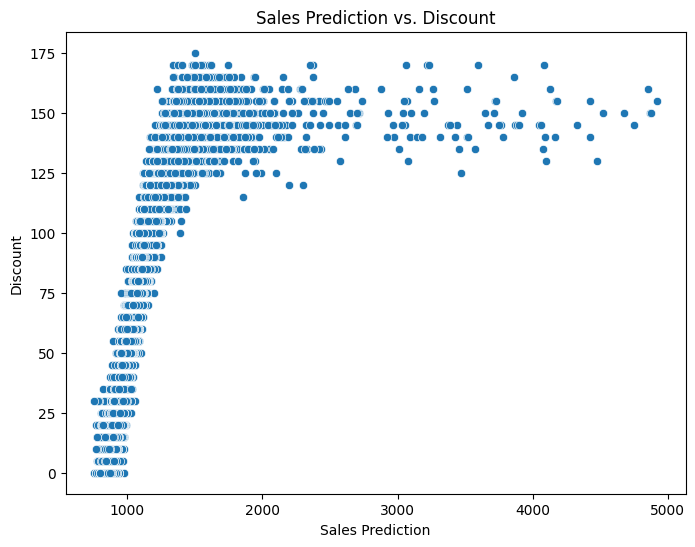

In [28]:
# Plot the relationship between age and discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='discount', data=data)
plt.title('Age vs. Discount')
plt.xlabel('Age')
plt.ylabel('Discount')
plt.show()

# Plot the relationship between customer state and discount
plt.figure(figsize=(12, 6))
sns.boxplot(x='cust_state', y='discount', data=data)
plt.title('Customer State vs. Discount')
plt.xlabel('Customer State')
plt.ylabel('Discount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Plot the relationship between sales prediction and discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sales_prediction', y='discount', data=data)
plt.title('Sales Prediction vs. Discount')
plt.xlabel('Sales Prediction')
plt.ylabel('Discount')
plt.show()

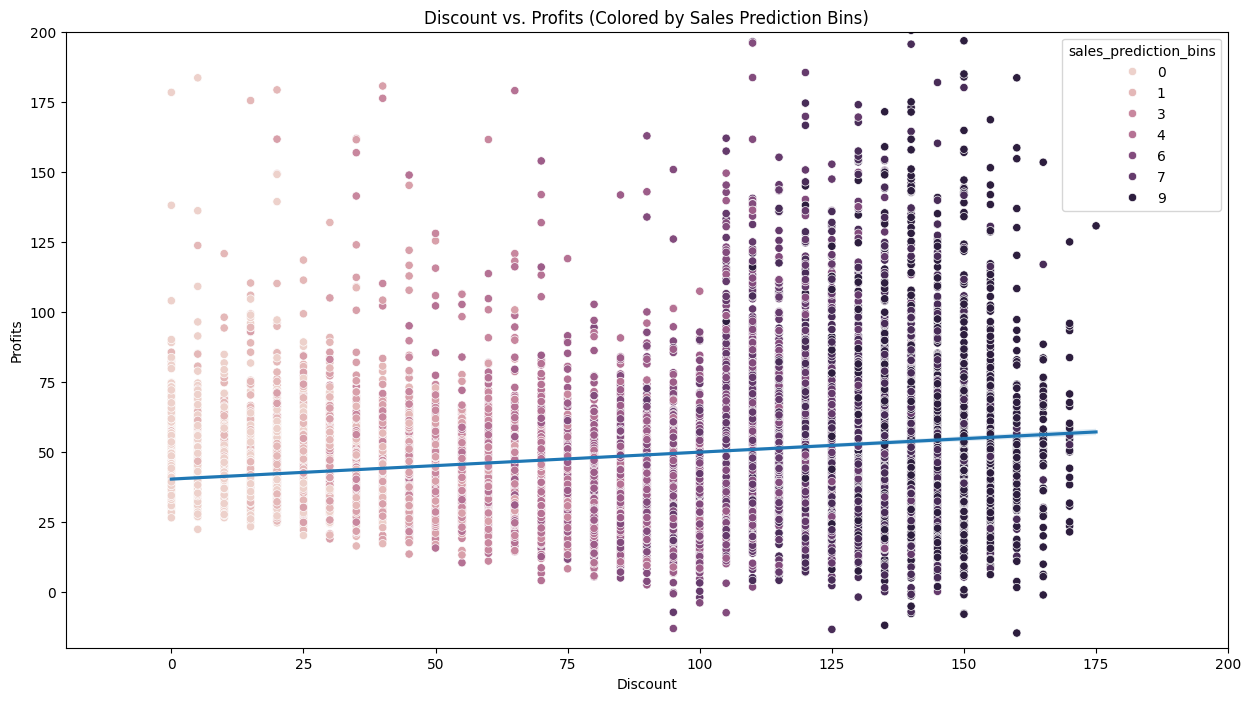

In [42]:
# Plot the relationship between profits and discount with color dimension
plt.figure(figsize=(15, 8))
sns.scatterplot(x='discount', y='profits', hue='sales_prediction_bins', data=data)
sns.regplot(x='discount', y='profits', data=data, scatter=False)
plt.title('Discount vs. Profits (Colored by Sales Prediction Bins)')
plt.xlabel('Discount')
plt.ylabel('Profits')
plt.ylim(-20, 200)
plt.xlim(-20, 200)
plt.show()

In [31]:
# Regression of sales on discount
sales_model = smf.ols('sales ~ discount', data=data).fit()
print(sales_model.summary())

# Regression of profits on discount
profits_model = smf.ols('profits ~ discount', data=data).fit()
print(profits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 6.341e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:29:14   Log-Likelihood:            -1.1363e+05
No. Observations:               15000   AIC:                         2.273e+05
Df Residuals:                   14998   BIC:                         2.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    804.5246      7.790    103.274      0.0

In [32]:
# Regression of discounts on sales_prediction and age
discount_model = smf.ols('discount ~ sales_prediction + age', data=data).fit()
print(discount_model.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:31:19   Log-Likelihood:                -71057.
No. Observations:               15000   AIC:                         1.421e+05
Df Residuals:                   14997   BIC:                         1.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -102.3049      1.299  

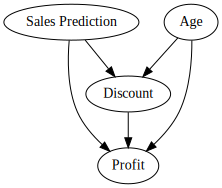

In [34]:
# causal graph

g = gr.Digraph()

g.edge("Sales Prediction", "Discount")
g.edge("Age", "Discount")
g.edge("Age", "Profit")
g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g

In [43]:
# Regression of discount on sales_prediction_bins (categorical)
discount_sales_bins_model = smf.ols('discount ~ C(sales_prediction_bins)', data=data).fit()
print(discount_sales_bins_model.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        03:00:17   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [52]:
# This discount residual can be seen as a version of discounts that have been debiased from sales_prediction_bins
data["discount_res"] = discount_sales_bins_model.resid + data["discount"].mean()
df_discount_res = data.copy()

In [50]:
df_discount_res.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction,profits,discount_prediction,discount_residual,discount_res
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765,43.432,118.429210,6.570790,84.335124
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387,31.655,78.123668,-3.123668,74.640665
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825,50.081,69.550982,-19.550982,58.213351
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735,63.098,55.891942,-45.891942,31.872391
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681,37.186,83.953979,16.046021,93.810355


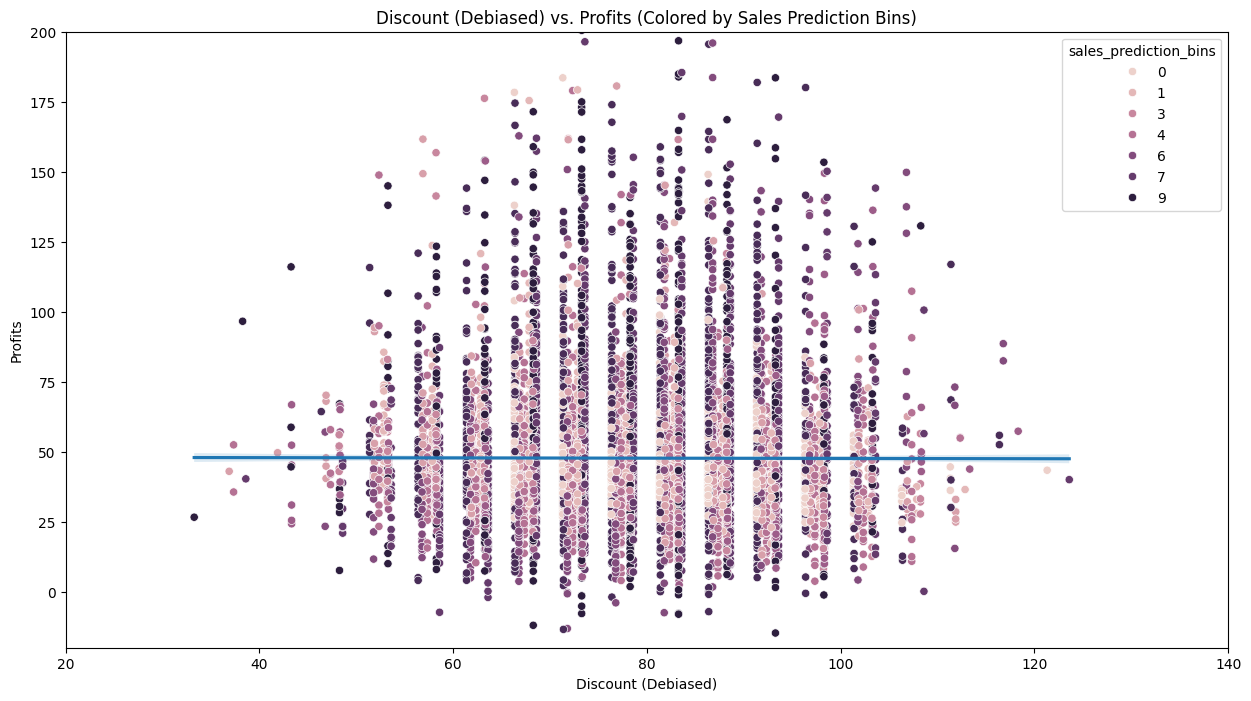

In [55]:
# Plot the relationship between profits and discount with color dimension
plt.figure(figsize=(15, 8))
sns.scatterplot(x='discount_res', y='profits', hue='sales_prediction_bins', data=df_discount_res)
sns.regplot(x='discount_res', y='profits', data=df_discount_res, scatter=False)
plt.title('Discount (Debiased) vs. Profits (Colored by Sales Prediction Bins)')
plt.xlabel('Discount (Debiased)')
plt.ylabel('Profits')
plt.ylim(-20, 200)
plt.xlim(20, 140)
plt.show()

In [57]:
# Regression of profit on sales_prediction_bins (categorical)
profit_sales_bins_model = smf.ols('profits ~ C(sales_prediction_bins)', data=df_discount_res).fit()
print(profit_sales_bins_model.summary())

df_discount_res["profit_res"] = profit_sales_bins_model.resid + df_discount_res["profits"].mean()
df_profit_res = df_discount_res.copy()

                            OLS Regression Results                            
Dep. Variable:                profits   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          6.18e-234
Time:                        03:18:02   Log-Likelihood:                -68381.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14990   BIC:                         1.369e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

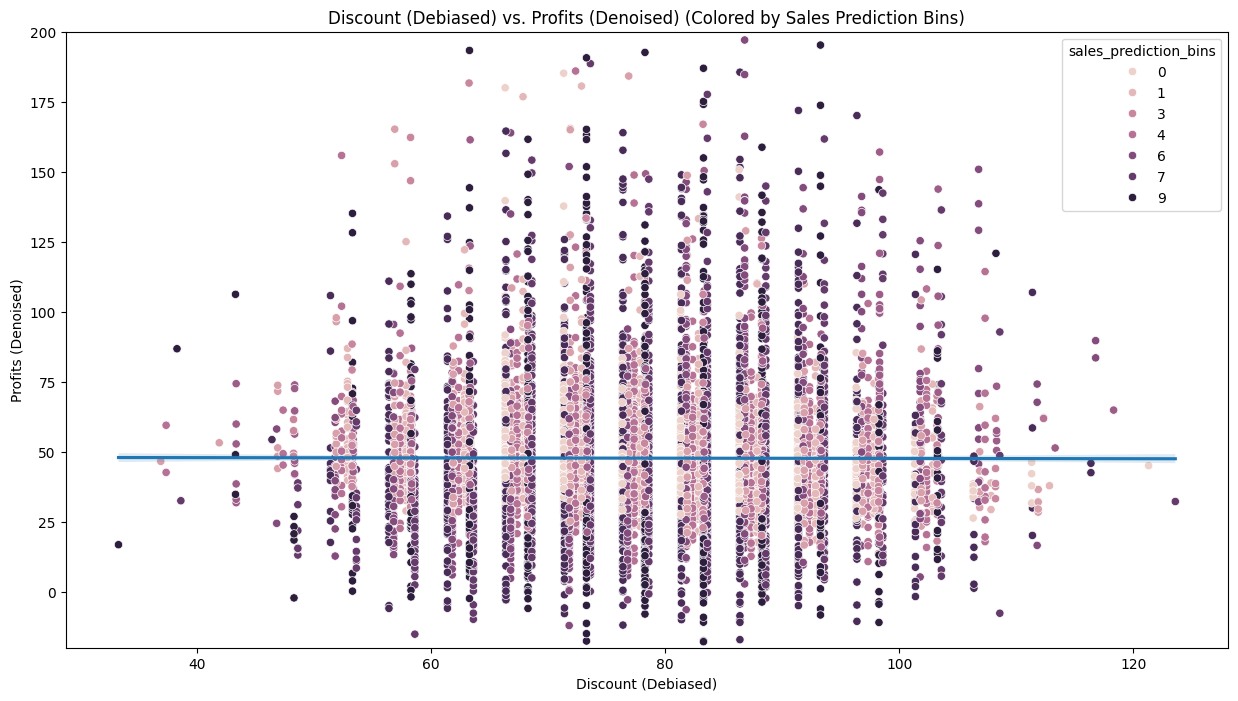

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_profit_res, x="discount_res", y="profit_res", hue="sales_prediction_bins")
sns.regplot(data=df_profit_res, x="discount_res", y="profit_res", scatter=False)
plt.title('Discount (Debiased) vs. Profits (Denoised) (Colored by Sales Prediction Bins)')
plt.xlabel('Discount (Debiased)')
plt.ylabel('Profits (Denoised)')
plt.ylim(-20, 200)
plt.show()

In [63]:
# variance reduction
df_profit_res["profit_res"].var(), df_profit_res["profit"].var()

(533.6349342591803, 545.4015163032522)

In [64]:
# Regression of profit residuals on discount residuals
profit_discount_res_model = smf.ols('profit_res ~ discount_res', data=df_profit_res).fit()
print(profit_discount_res_model.summary())

                            OLS Regression Results                            
Dep. Variable:             profit_res   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07791
Date:                Sun, 23 Feb 2025   Prob (F-statistic):              0.780
Time:                        03:25:33   Log-Likelihood:                -68381.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14998   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.0841      1.352     35.556   

In [65]:
# Regression of profit on discount and sales_prediction_bins
profit_model = smf.ols('profits ~ discount + C(sales_prediction_bins)', data=data).fit()
print(profit_model.summary())

# Extract the discount coefficient
discount_coefficient = profit_model.params['discount']
print(f"\nThe discount coefficient is: {discount_coefficient}")

                            OLS Regression Results                            
Dep. Variable:                profits   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     115.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          6.93e-233
Time:                        03:27:22   Log-Likelihood:                -68381.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14989   BIC:                         1.369e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     